In [19]:
import os
import time
import json
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
from pylab import rcParams
from sklearn.utils import check_random_state
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, \
    GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Importing random forest model and libraries
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.model_selection import cross_val_score
import scipy as sp
import pickle as pkl
%matplotlib inline

In [20]:
import pandas as pd
if True:
    df_P100 = pd.read_csv('p100_all_data.csv', index_col = 0)
    df_V100 = pd.read_csv('v100_all_data.csv', index_col = 0)
    new_df = pd.read_csv('new_df.csv', index_col = 0)
    all_data = pd.read_csv('all_data.csv', index_col = 0)
if True:
    all_data = all_data.dropna(axis=1,how='any')

In [26]:
## new_df = P100 Metrics with V100 IPC
df_new = new_df

#grabbing IPC values
newdf_ipc = df_new.drop(columns=['shared_utilization','stall_other','single_precision_fu_utilization','architecture','input','application_name','kernelname'])
newdf_ipc = newdf_ipc['ipc']
new_ipc_values = newdf_ipc.values

df_new_norm = df_new.drop(columns=['shared_utilization','stall_other','single_precision_fu_utilization','architecture','input','application_name','kernelname','ipc'])
df_new_norm = df_new_norm.values
df_new_norm = MinMaxScaler().fit_transform(df_new_norm)

# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
X_new = df_new_norm
Y_new = new_ipc_values

# Split the data up in train and test sets
X_trainnew, X_testnew, y_trainnew, y_testnew = train_test_split(X_new, Y_new, test_size=0.33, random_state=42)



In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def process(new_df):
    ipc_values = new_df['ipc'].values
    new_def_norm = new_df.drop(columns=['shared_utilization','stall_other','single_precision_fu_utilization','architecture','input','ipc','application_name','kernelname'])

    #v100+p100 combined
    new_def_norm_values = new_def_norm.values
    new_def_norm = MinMaxScaler().fit_transform(new_def_norm_values)

    ###!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!####
    X_VP = new_def_norm 
    Y_VP = ipc_values

    # Split the data up in train and test sets
    X_trainVP, X_testVP, y_trainVP, y_testVP = train_test_split(X_VP, Y_VP, test_size=0.02, random_state=False)

    # Import `StandardScaler` from `sklearn.preprocessing`
    from sklearn.preprocessing import StandardScaler

    # Define the scaler 
    #scalerVP = StandardScaler().fit(X_trainVP)
    scalerVP = StandardScaler().fit(X_trainVP)

    # Scale the train set
    X_trainVP = scalerVP.transform(X_trainVP)

    # Scale the test set
    X_testVP = scalerVP.transform(X_testVP)
    
    return X_trainVP, X_testVP, y_trainVP, y_testVP, X_VP, Y_VP



In [36]:
#Creating two data sets 
from_scratch = False
df = pd.read_csv('all_data.csv', index_col = 0)
df = df.dropna(axis=1,how='any')
if from_scratch:
    df_check = None
    frames = []
    frame2 = []
    df_v = []
    df_p = []
    for name, item in df.groupby(['kernelname', 'input']):
        df_1 = df[ df['kernelname'] == name[0] ]
        df_2 = df_1[ df_1['input'] == name[1] ]
        if len(df_2) == 2:
            df_v = df_2[df_2['architecture'] == 'V100']
            df_p = df_2[df_2['architecture'] == 'P100']
            #df_p['ipc'][0] = df_v.iloc[0]['ipc']
            frames.append(df_p)
            frame2.append(df_v)

    new_df = pd.concat(frames)
    new_v = pd.concat(frame2)

In [39]:
if from_scratch:
    new_df.to_csv('cor_p100.csv')
    new_v.to_csv('cor_v100.csv')
else:
    new_p = pd.read_csv('cor_p100.csv', index_col = 0)
    new_v = pd.read_csv('cor_v100.csv', index_col = 0)

In [42]:
X_trainP, X_testP, y_trainP, y_testP, X_P, Y_P = process(new_p)
X_trainV, X_testV, y_trainV, y_testV, X_V, Y_V = process(new_v)

In [44]:
#need to create two data sets- one with corresponding p100 runs and another with v100 runs 

print(X_trainP.shape)
print(X_trainV.shape)
#print('\n \n \n \n ---V100--- results \n \n')
#print(new_v['inst_per_warp'])
#print('\n \n \n \n P100 results \n \n')
#print(new_df['inst_per_warp'])


(20170, 112)
(20170, 112)


In [45]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
#dataset = pd.read_csv("p100_only.csv", delimiter=",").values
# split into input (X) and output (Y) variables
#X = dataset[:,0:8]
#Y = dataset[:,8]
# create model
def my_model():
    model = Sequential()
    """
    #original simple dl model
    model.add(Dense(12, input_dim=112, kernel_initializer='normal',activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(1, activation='relu'))"""
    #early stopping, smaller layers, less layers
    model.add(Dense(120, input_dim=112, kernel_initializer='normal',activation='relu'))
    model.add(Dense(110, activation='relu'))
    #model.add(Dense(100, activation='relu'))
    #model.add(Dense(90, activation='relu'))
    #model.add(Dense(100, activation='relu'))
    #model.add(Dense(110, activation='relu'))
    model.add(Dense(110, activation='relu'))
    model.add(Dense(112, activation=None))
    # Compile model
    #mean absolute percentage error - indicating that we seek to minimize the mean percentage difference between 
    #predicted ipc and the actual ipc
    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
    # Fit the model
    ## model.fit(X, Y, epochs=10, batch_size=10) ##works

    """
    # evaluate the model
    scores = model.evaluate(X, Y)
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))"""
    return model

In [47]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

#early stopping - once validation error stops improving, cut it off
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=100, verbose=1, mode='min')
callbacks=earlystop
p_model = my_model()
mc = ModelCheckpoint('filename.h5', monitor='val_loss', mode='min', verbose=1,save_best_only=True)
#callbacks_list = [earlystop, mc]
p_model.fit(X_trainP, X_trainV, epochs=2000, batch_size=10000, verbose=1,validation_split=0.7,callbacks=[earlystop,mc])

Train on 6051 samples, validate on 14119 samples
Epoch 1/2000
6051/6051 [==============================] - 0s 60us/step - loss: 0.9048 - mean_squared_error: 0.9048 - mean_absolute_error: 0.4793 - val_loss: 0.7509 - val_mean_squared_error: 0.7509 - val_mean_absolute_error: 0.4736

Epoch 00001: val_loss improved from inf to 0.75093, saving model to filename.h5
Epoch 2/2000
6051/6051 [==============================] - 0s 13us/step - loss: 0.8736 - mean_squared_error: 0.8736 - mean_absolute_error: 0.4678 - val_loss: 0.7309 - val_mean_squared_error: 0.7309 - val_mean_absolute_error: 0.4676

Epoch 00002: val_loss improved from 0.75093 to 0.73087, saving model to filename.h5
Epoch 3/2000
6051/6051 [==============================] - 0s 13us/step - loss: 0.8488 - mean_squared_error: 0.8488 - mean_absolute_error: 0.4618 - val_loss: 0.7136 - val_mean_squared_error: 0.7136 - val_mean_absolute_error: 0.4647

Epoch 00003: val_loss improved from 0.73087 to 0.71362, saving model to filename.h5
Epoch 4

In [63]:
y_pred = p_model.predict(X_testP)
#print(y_pred[1])
#print(X_testP[1])
#give it a seed 
#Averaging down the columns first (metrics), which converts it to 1 error per metric, then averages that (one row)
mse = np.mean(np.mean(np.square(y_pred-X_testV),axis=0))
rmse = np.sqrt(mse)

normX_testV = np.mean(np.mean(np.square(X_testV),axis=0))
#relative to the full scale of all the test data - 3x bigger because it's one number scaling across all metrics
mse_relative = np.mean(np.mean(np.square(y_pred-X_testV),axis=0))/normX_testV
mspe = np.mean(np.mean(np.square(y_pred-X_testV),axis=0))/normX_testV ## ask bethany
rmse_relative = np.sqrt(mspe)

#left out the mean, i would get the error rate for each metric
#first show val error decreasings as training data increases
#second show that val error can decreases earlier with active learning implementation

print("MSE:", mse)
print("RMSE:", rmse)
print("MSPE:", mspe)

MSE: 0.04291083472619891
RMSE: 0.20714930539637083
MSPE: 0.0866798283865592


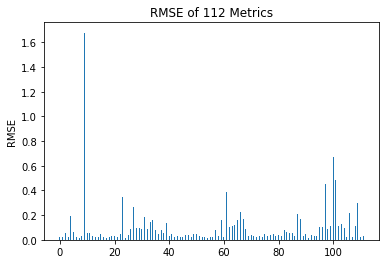

In [64]:
import numpy as np
import matplotlib.pyplot as plt


N = 112
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, np.sqrt(np.mean(np.square(y_pred -X_testV),axis=0)), width)

#Showing which metrics are more difficult to acquire
plt.ylabel('RMSE')
plt.title('RMSE of 112 Metrics')


plt.show()

In [65]:
#histogram of different metrics
#RMSE shows that there is around a 1% error in predicting V100 metrics from P100 data

In [71]:
print(y_pred.shape)
print(X_testV.shape)

(412, 112)
(412, 112)


R: 0.9557044536042921
MAE: 0.041381273266102164 s
RMSE: 0.2071493053963709 s


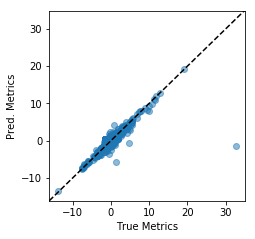

In [79]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Plotting predicted vs true
print ("R:",  sp.stats.pearsonr(X_testV.flatten(), y_pred.flatten())[0])
print ("MAE:", np.abs(y_pred.flatten() - X_testV.flatten()).mean(), 's')
print ("RMSE:", np.sqrt(np.power(X_testV.flatten()- y_pred.flatten(), 2).mean()), 's')


fig, ax = plt.subplots()

# Make the plot
ax.scatter(X_testV, y_pred, alpha=0.5)

# Make it pretty
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_xlim())

ax.set_xlabel('True Metrics')
ax.set_ylabel('Pred. Metrics')

fig.set_size_inches(3.5, 3.5)

# Add in the goal line
ax.plot(ax.get_xlim(), ax.get_ylim(), 'k--');
plt.savefig("metric_predict.png")

<Figure size 432x288 with 0 Axes>